# PERBANDINGAN JAM KELEMBABAN(RH)
## Januari 2023

In [2]:
import pandas as dp
import numpy as np
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#File Synoptik dan AWS
df = dp.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/DATA/KelembapanSynop.csv')
df = df.drop(df.index[-3:])
dft = dp.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')
print(df)
print(dft)


   Tgl  00.00  01.00  02.00  03.00  04.00  05.00  06.00  07.00  08.00  09.00  \
0    1     83     76     67     67     61     60     67     69     72     74   
1    2     94     81     75     70     69     66     68     69     72     75   
2    3     89     84     75     74     66     64     58     58     60     67   
3    4     80     74     71     70     64     62     67     63     61     65   
4    5     85     74     64     57     56     57     60     57     59     58   
5    6     84     73     63     61     58     60     58     58     60     61   
6    7     83     72     66     63     62     65     68     63     65     68   
7    8     85     76     63     61     57     53     52     65     60     65   
8    9     92     81     80     78     83     75     76     73     88     88   
9   10     96     92     86     76     68     66     65     60     89     92   
10  11     92     81     76     72     70     71     72     68     93     97   
11  12     91     88     84     77     7

In [3]:
#UJI T
def ujiT(synop ):
  global p_two4
  sample1_bar4, sample2_bar4 = np.mean(df_sorted_4[synop]), np.mean(df_sorted1_4['rh_avg'])
  n14, n24 = len(df_sorted_4[synop]), len(df_sorted_4[synop])
  df_4=(n14+n24)-2
  var_sample14, var_sample24= np.var(df_sorted_4[synop], ddof=1), np.var(df_sorted1_4['rh_avg'], ddof=1)

  # pooled sample variance
  var4 = ( ((n14-1)*var_sample14) + ((n24-1)*var_sample24) ) / (n14+n24-2)

  # standard error
  std_error4 = np.sqrt(var4 * (1.0 / n14 + 1.0 / n24))

  # calculate t statistics
  t4 = abs(sample1_bar4- sample2_bar4) / std_error4
  print('t static:',t4)
  # two-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.975, df=df_4)
  print("Critical value for t two tailed:",t_c4)


  # one-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.95, df=df_4)
  print("Critical value for t one tailed:",t_c4)


  # get two-tailed p value
  p_two4= 2*(1-stats.t.cdf(x=t4, df=df_4))
  print("p-value for two tailed:",p_two4)

  # get one-tailed p value
  p_one4= 1-stats.t.cdf(x=t4, df=df_4)
  print("p-value for one tailed:",p_one4)
  if p_two4>=0.05:
    print("Tidak ada perbedaan yang signifikan antara dua kelompok data")
  else:
    print("Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).")

In [4]:
#Uji Mann-Whitney U
def mwu(synop):
  global p_value
  df_cleaned_4['rh_avg'] = df_cleaned_4['rh_avg'].astype(float)
  stat, p_value = mannwhitneyu(df_cleaned_4['rh_avg'], df_cleaned14[synop])
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # Level of significance
  alpha = 0.05
  # conclusion
  if p_value < alpha:
      print('Terdapat perbedaan yang siginifikan antara 2 sampel data')
  else:
      print('Tidak ada perbedaan yang siginifikan antara 2 sampel data')

In [5]:
#Normalisasi Data
def absolute_maximum_scale(series):
  return series / series.abs().max()

Jam 00

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.2399394249420146
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.2198253270479853
p-value for one tailed: 0.10991266352399265
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


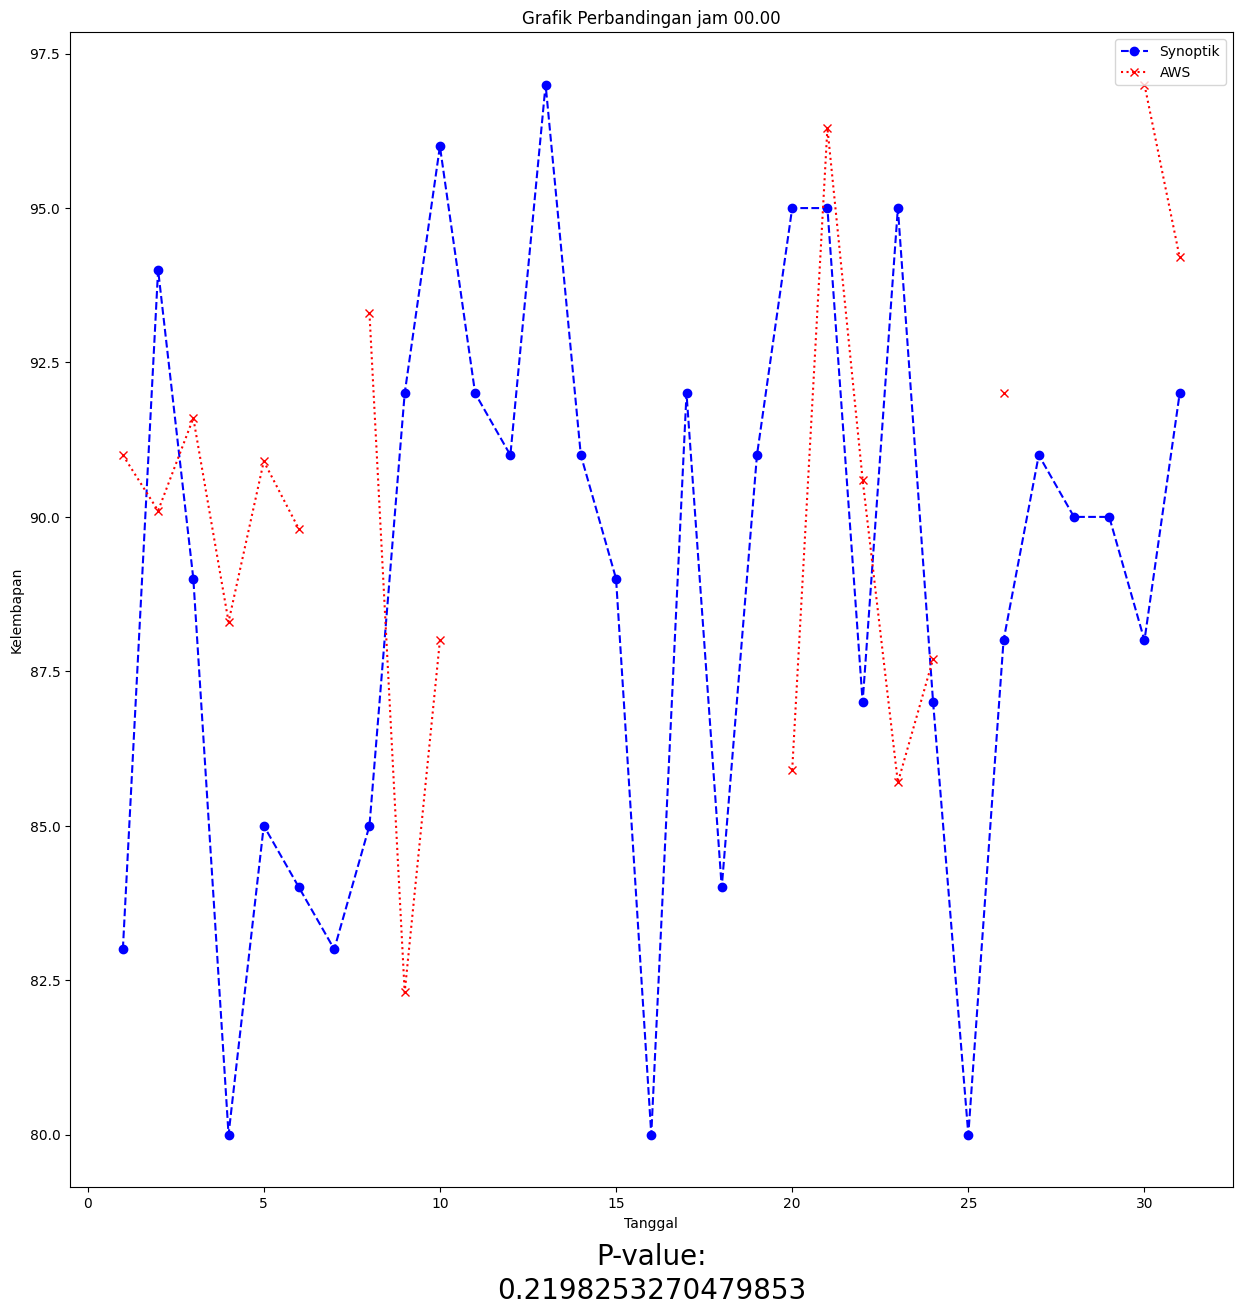

In [7]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['00.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='00.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['00.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('00.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['00.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='00.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['00.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('00.00')
    else:
      print("Dilakukan Uji T")
      ujiT('00.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('00.00')
    else:
      print("Dilakukan Uji T")
      ujiT('00.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 00.00')
plt.plot(df2_4['Tgl'], df2_4['00.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 1

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.3334912232957789
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.7399261813831317
p-value for one tailed: 0.36996309069156585
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


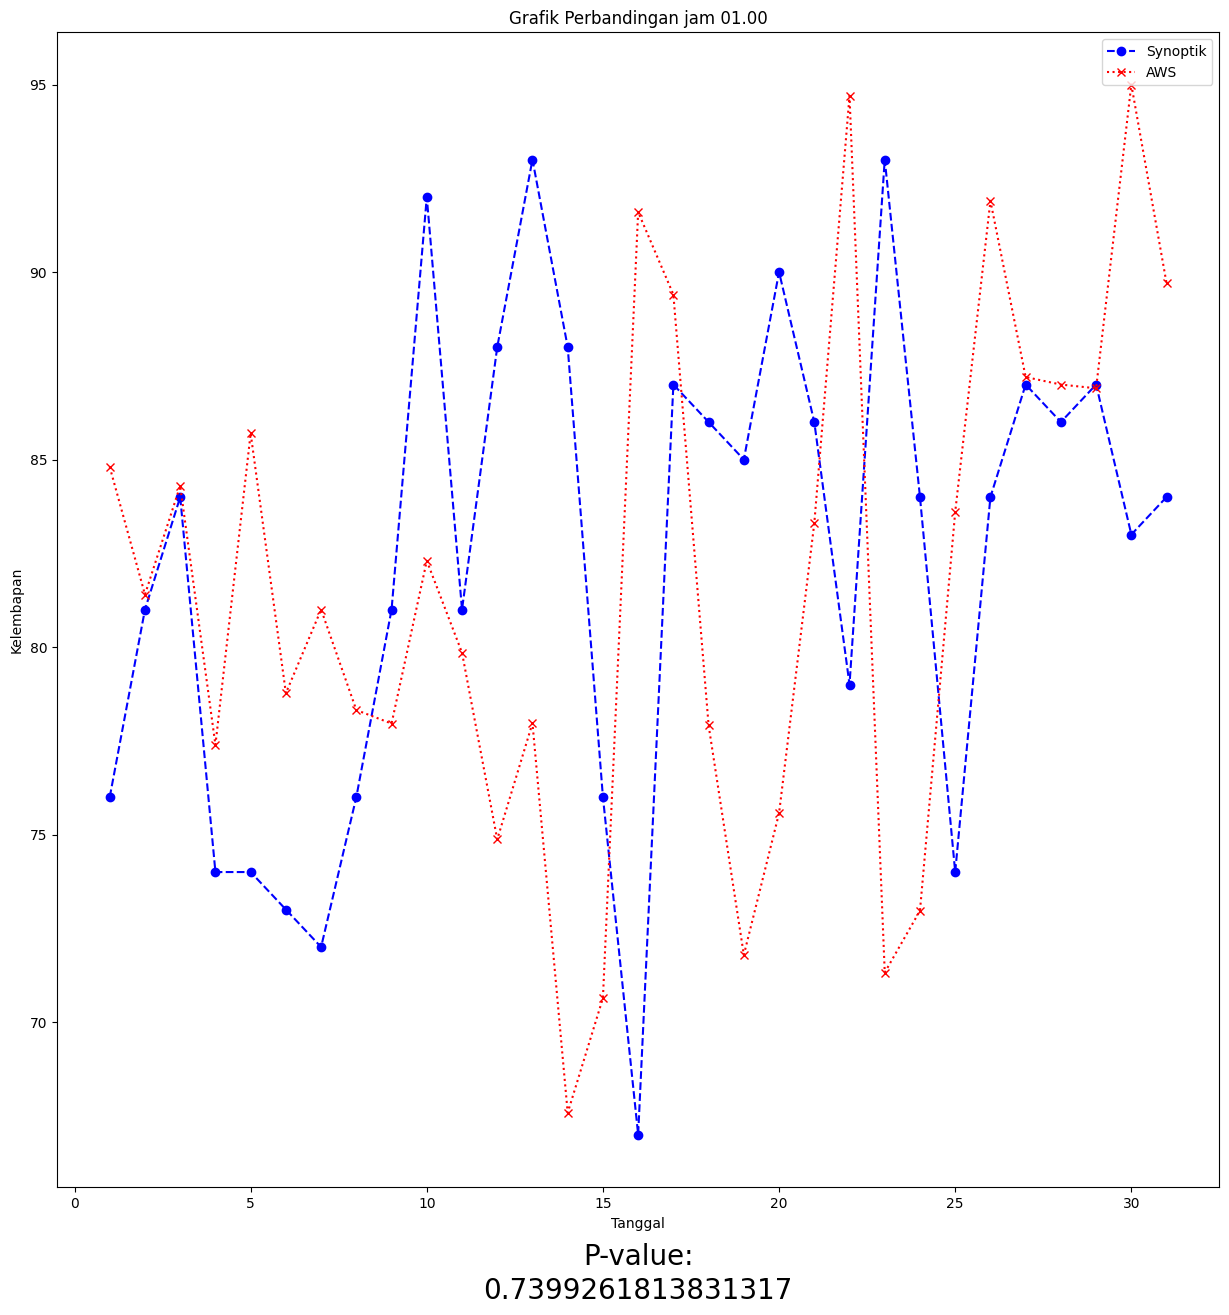

In [8]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('01:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['01.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='01.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['01.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('01.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['01.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='01.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['01.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('01.00')
    else:
      print("Dilakukan Uji T")
      ujiT('01.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('01.00')
    else:
      print("Dilakukan Uji T")
      ujiT('01.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 01.00')
plt.plot(df2_4['Tgl'], df2_4['01.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 2

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.01262454124292447
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.9899692256212203
p-value for one tailed: 0.4949846128106101
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


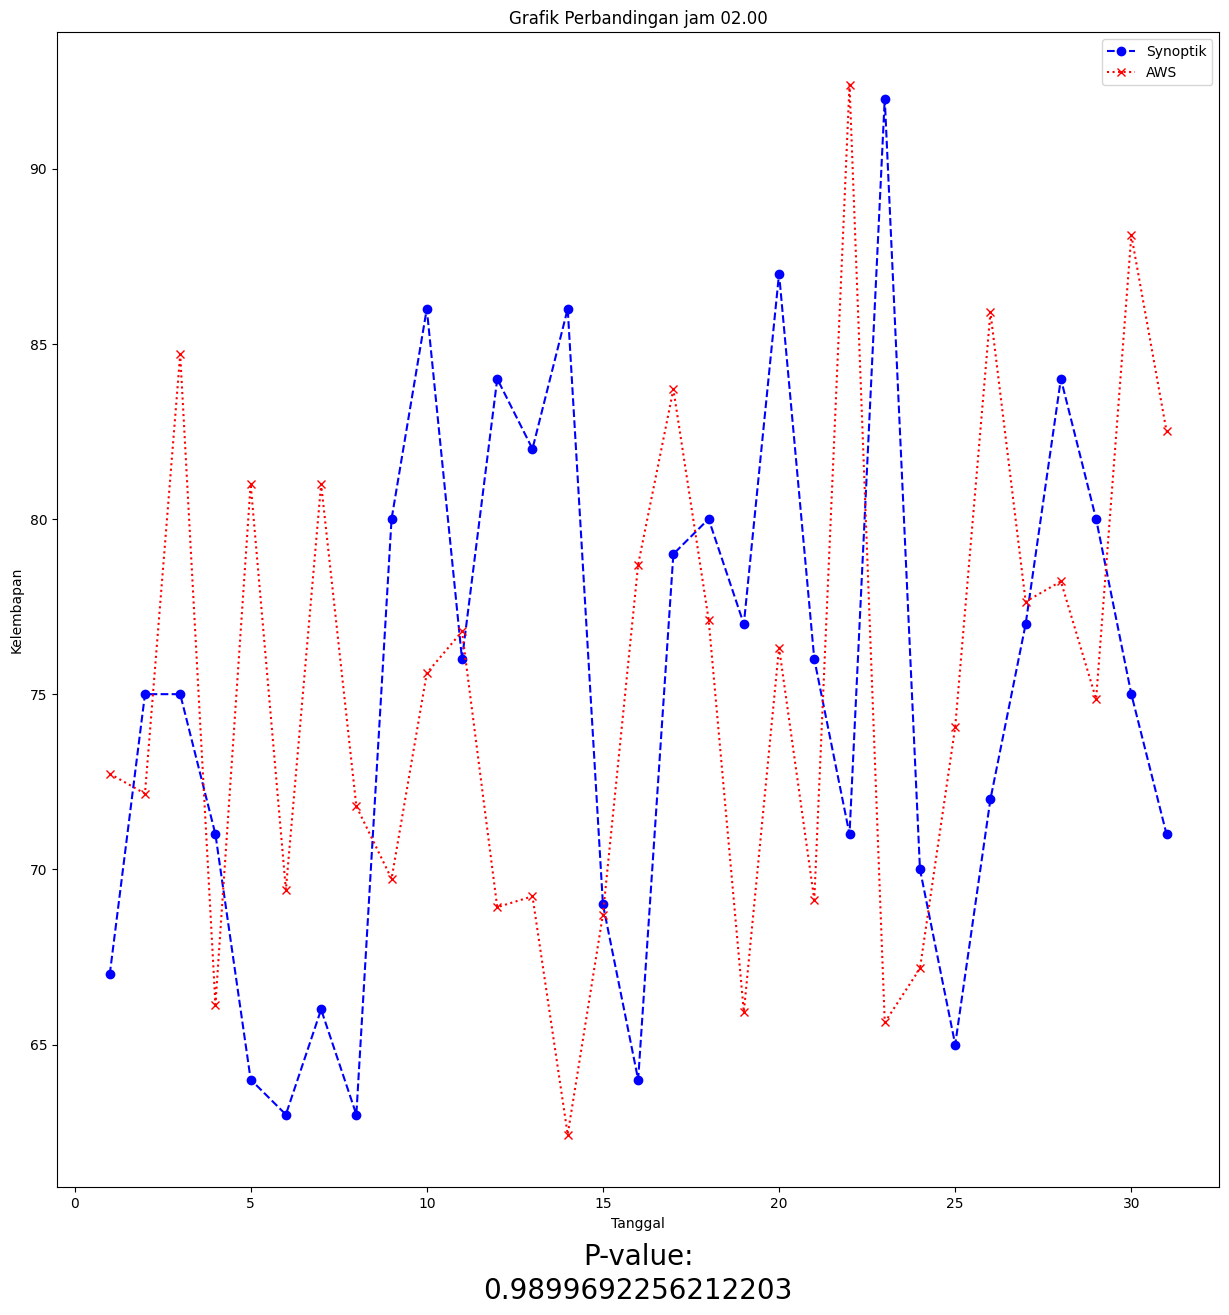

In [9]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('02:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['02.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='02.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['02.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('02.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['02.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='02.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['02.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('02.00')
    else:
      print("Dilakukan Uji T")
      ujiT('02.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('02.00')
    else:
      print("Dilakukan Uji T")
      ujiT('02.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 02.00')
plt.plot(df2_4['Tgl'], df2_4['02.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 3

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 6.428929242248257
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 2.335548510146168e-08
p-value for one tailed: 1.167774255073084e-08
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


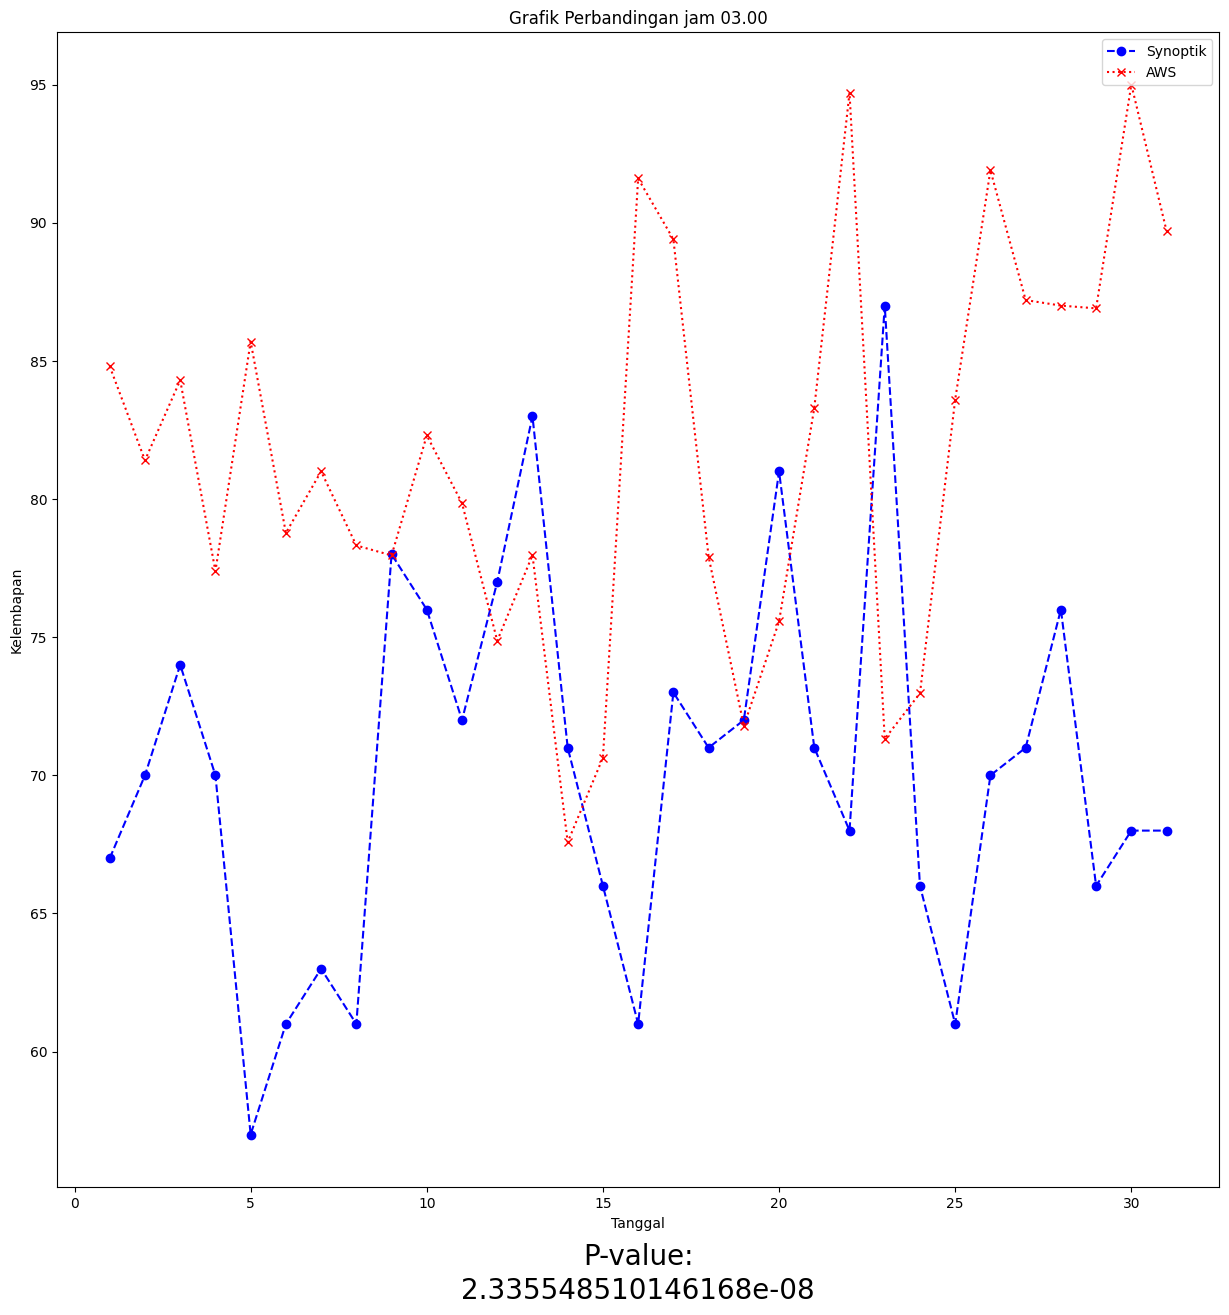

In [10]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('01:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['03.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='03.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['03.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('03.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['03.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='03.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['03.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('03.00')
    else:
      print("Dilakukan Uji T")
      ujiT('03.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('03.00')
    else:
      print("Dilakukan Uji T")
      ujiT('03.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 03.00')
plt.plot(df2_4['Tgl'], df2_4['03.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 4

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.329579604987154
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.7428654772903016
p-value for one tailed: 0.3714327386451508
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


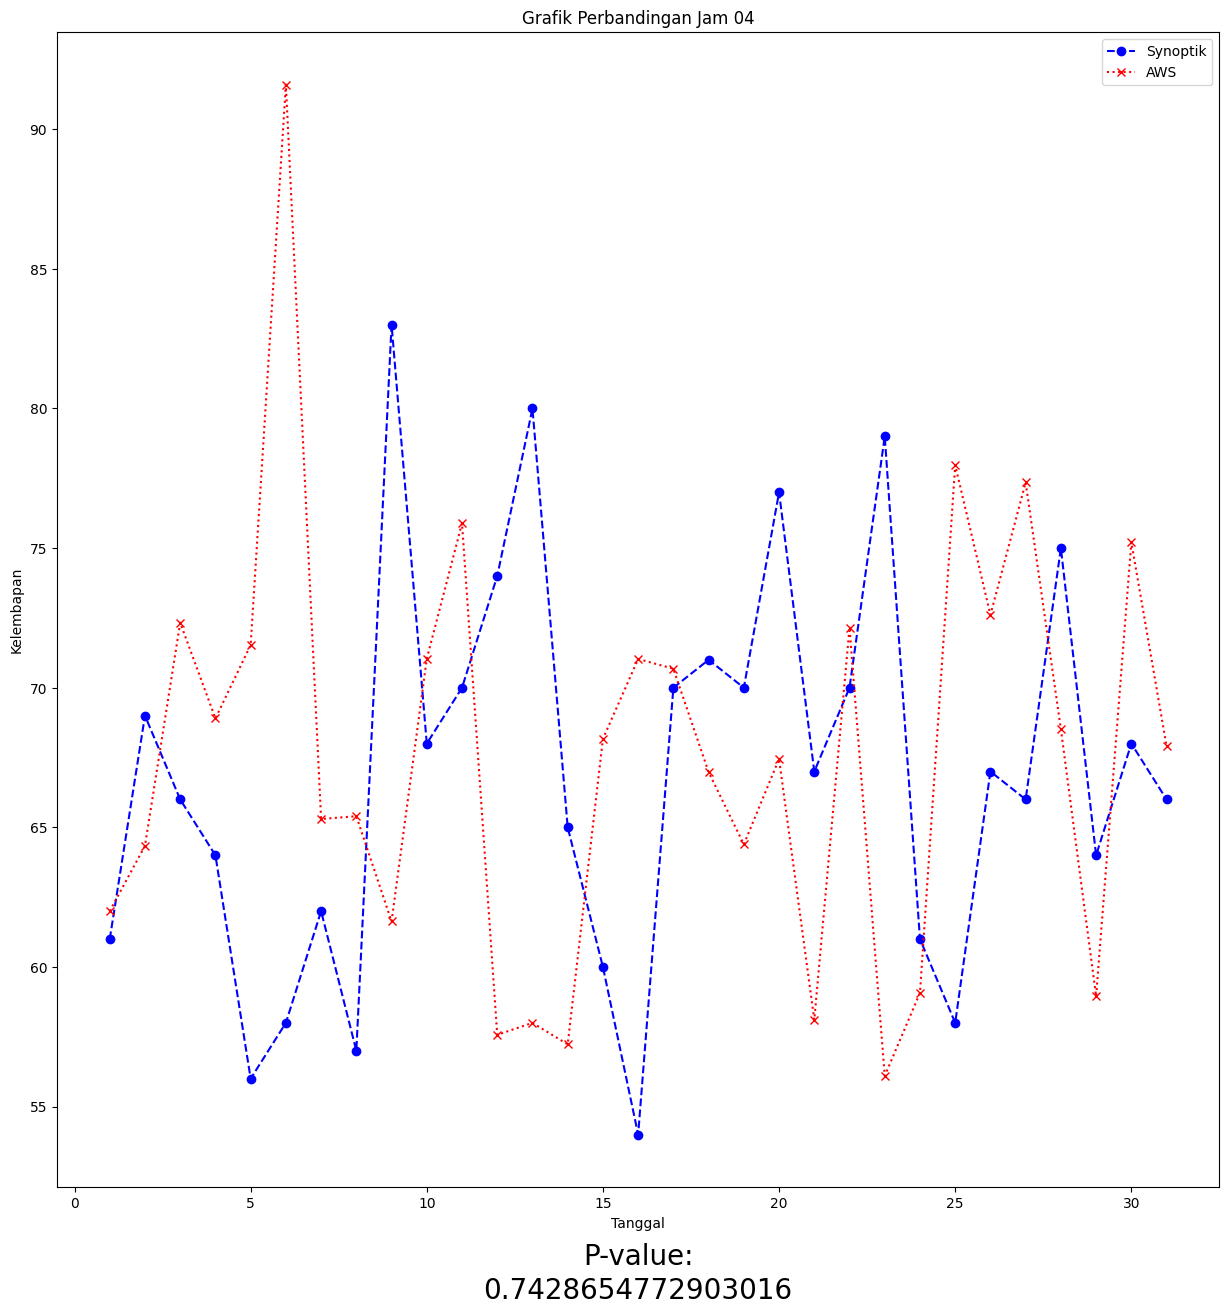

In [11]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('04:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['04.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='04.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['04.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('04.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['04.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='04.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('04.00')
    else:
      print("Dilakukan Uji T")
      ujiT('04.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('04.00')
    else:
      print("Dilakukan Uji T")
      ujiT('04.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 04')
plt.plot(df2_4['Tgl'], df2_4['04.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 5

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.1767558835105056
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.2439403623248355
p-value for one tailed: 0.12197018116241776
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


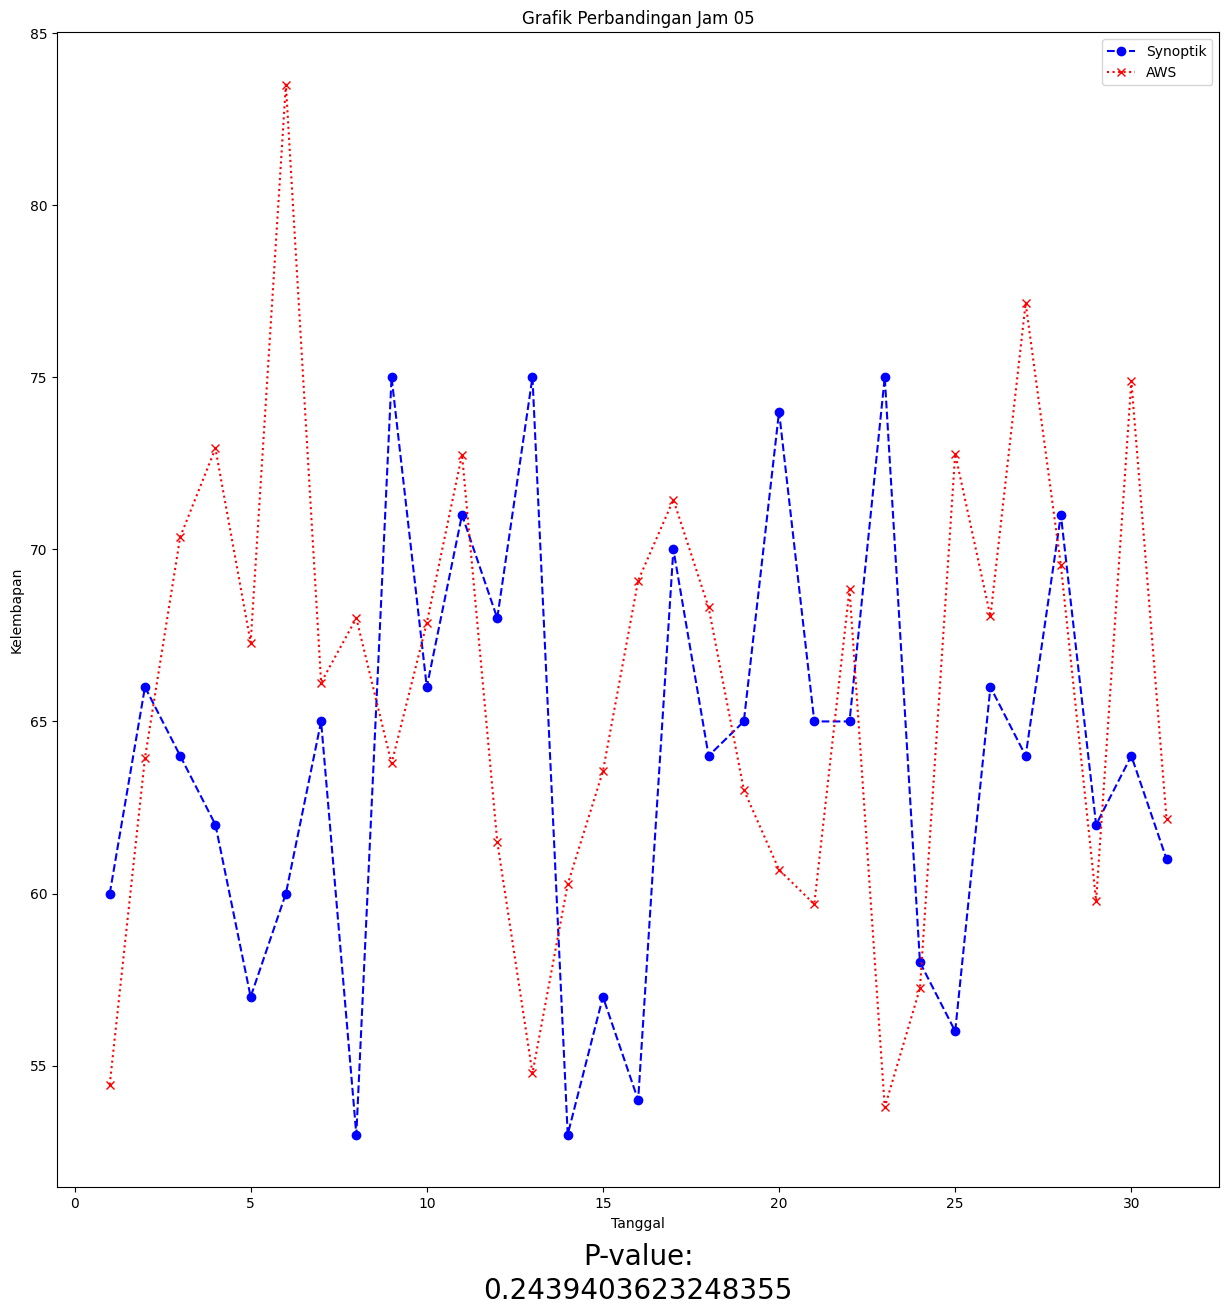

In [13]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('05:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['05.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='05.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['05.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('05.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['05.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='05.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('05.00')
    else:
      print("Dilakukan Uji T")
      ujiT('05.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('05.00')
    else:
      print("Dilakukan Uji T")
      ujiT('05.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 05')
plt.plot(df2_4['Tgl'], df2_4['05.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show() 

Jam 6

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.9822667603487778
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.3299128046888691
p-value for one tailed: 0.16495640234443454
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


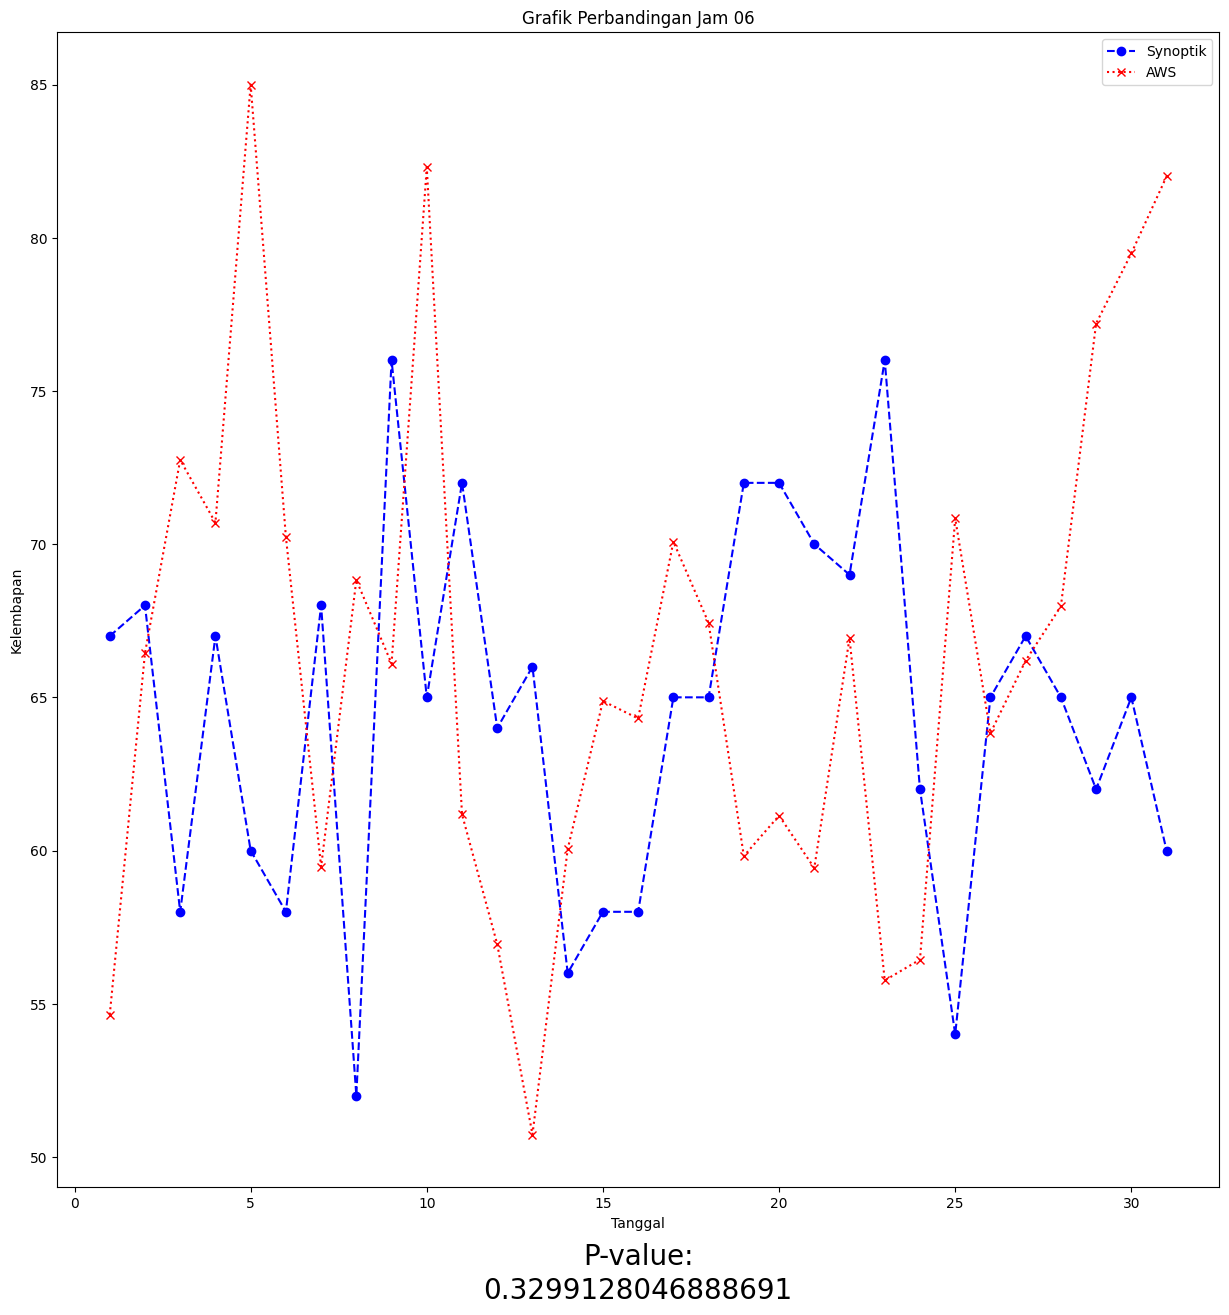

In [7]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('06:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['06.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='06.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['06.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('06.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['06.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='6', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('06.00')
    else:
      print("Dilakukan Uji T")
      ujiT('06.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('06.00')
    else:
      print("Dilakukan Uji T")
      ujiT('06.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 06')
plt.plot(df2_4['Tgl'], df2_4['06.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 7

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=532.50, p=0.47
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


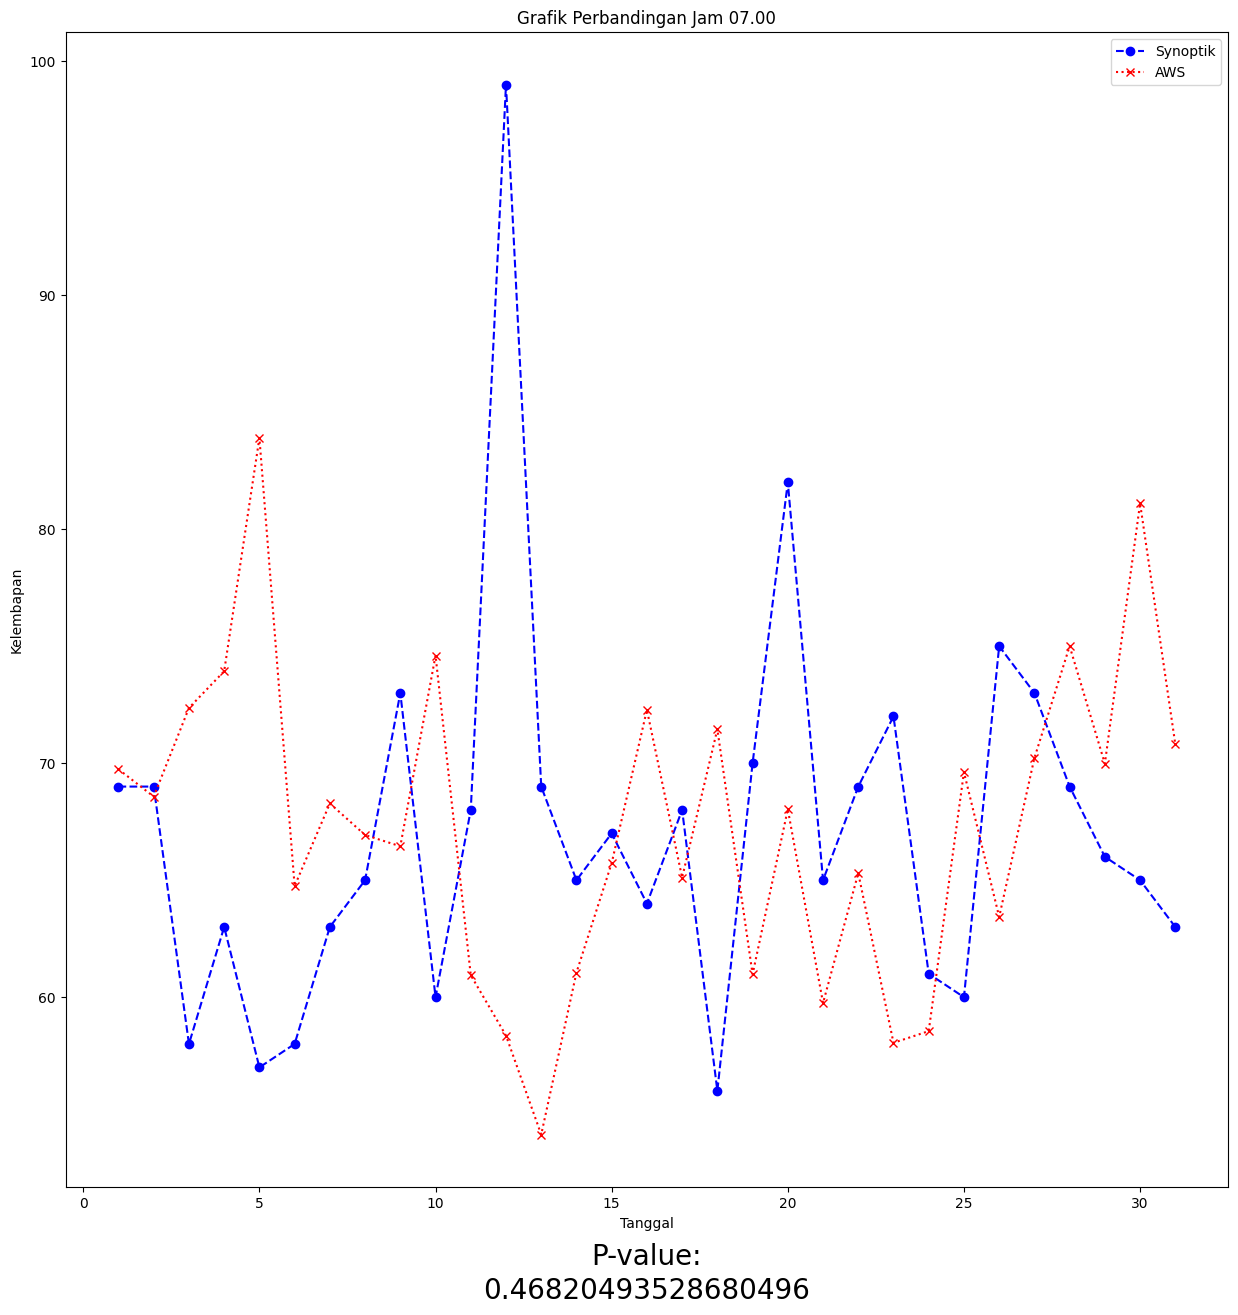

In [6]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('07:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['07.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='07.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['07.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('07.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['07.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='07.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['07.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('07.00')
    else:
      print("Dilakukan Uji T")
      ujiT('07.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('07.00')
    else:
      print("Dilakukan Uji T")
      ujiT('07.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 07.00')
plt.plot(df2_4['Tgl'], df2_4['07.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 8

Indeks baris yang berisi NaN:
Index([11], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=457.00, p=0.91
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_16748\2264744751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['rh_avg'] = df_cleaned_4['rh_avg'].astype(float)


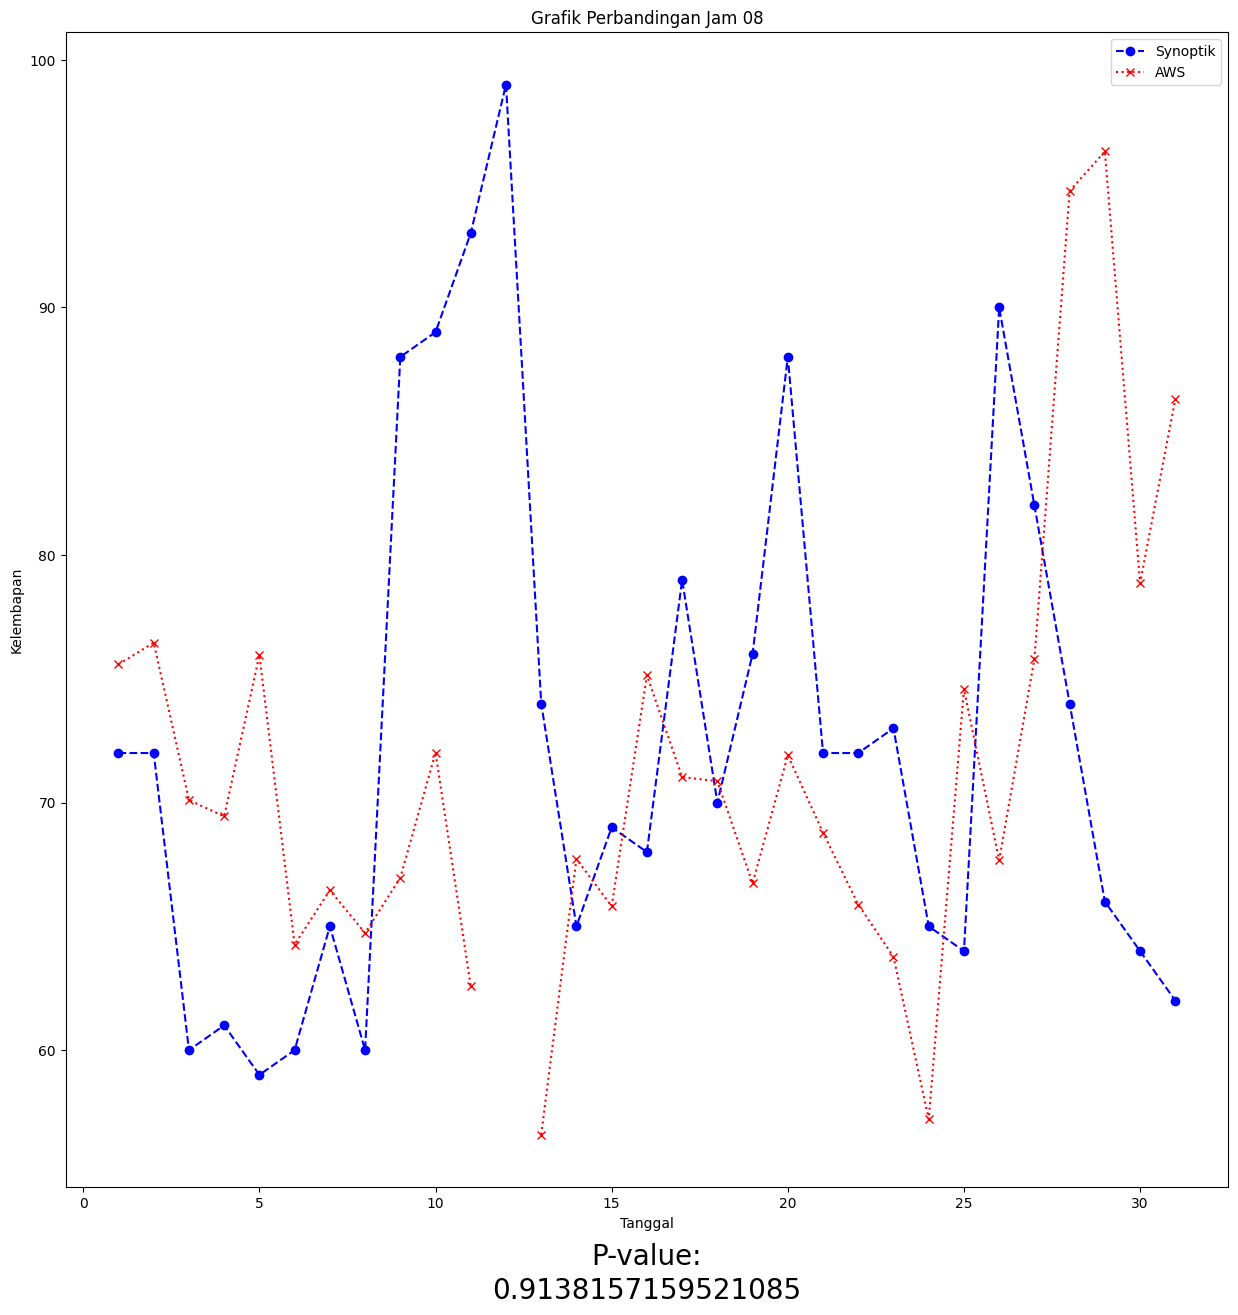

In [8]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('08:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['08.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='08.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['08.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('08.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['08.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='08.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['08.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('08.00')
    else:
      print("Dilakukan Uji T")
      ujiT('08.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('08.00')
    else:
      print("Dilakukan Uji T")
      ujiT('08.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 08')
plt.plot(df2_4['Tgl'], df2_4['08.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 9

Indeks baris yang berisi NaN:
Index([11], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.43245833582775567
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.6669587348975026
p-value for one tailed: 0.3334793674487513
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


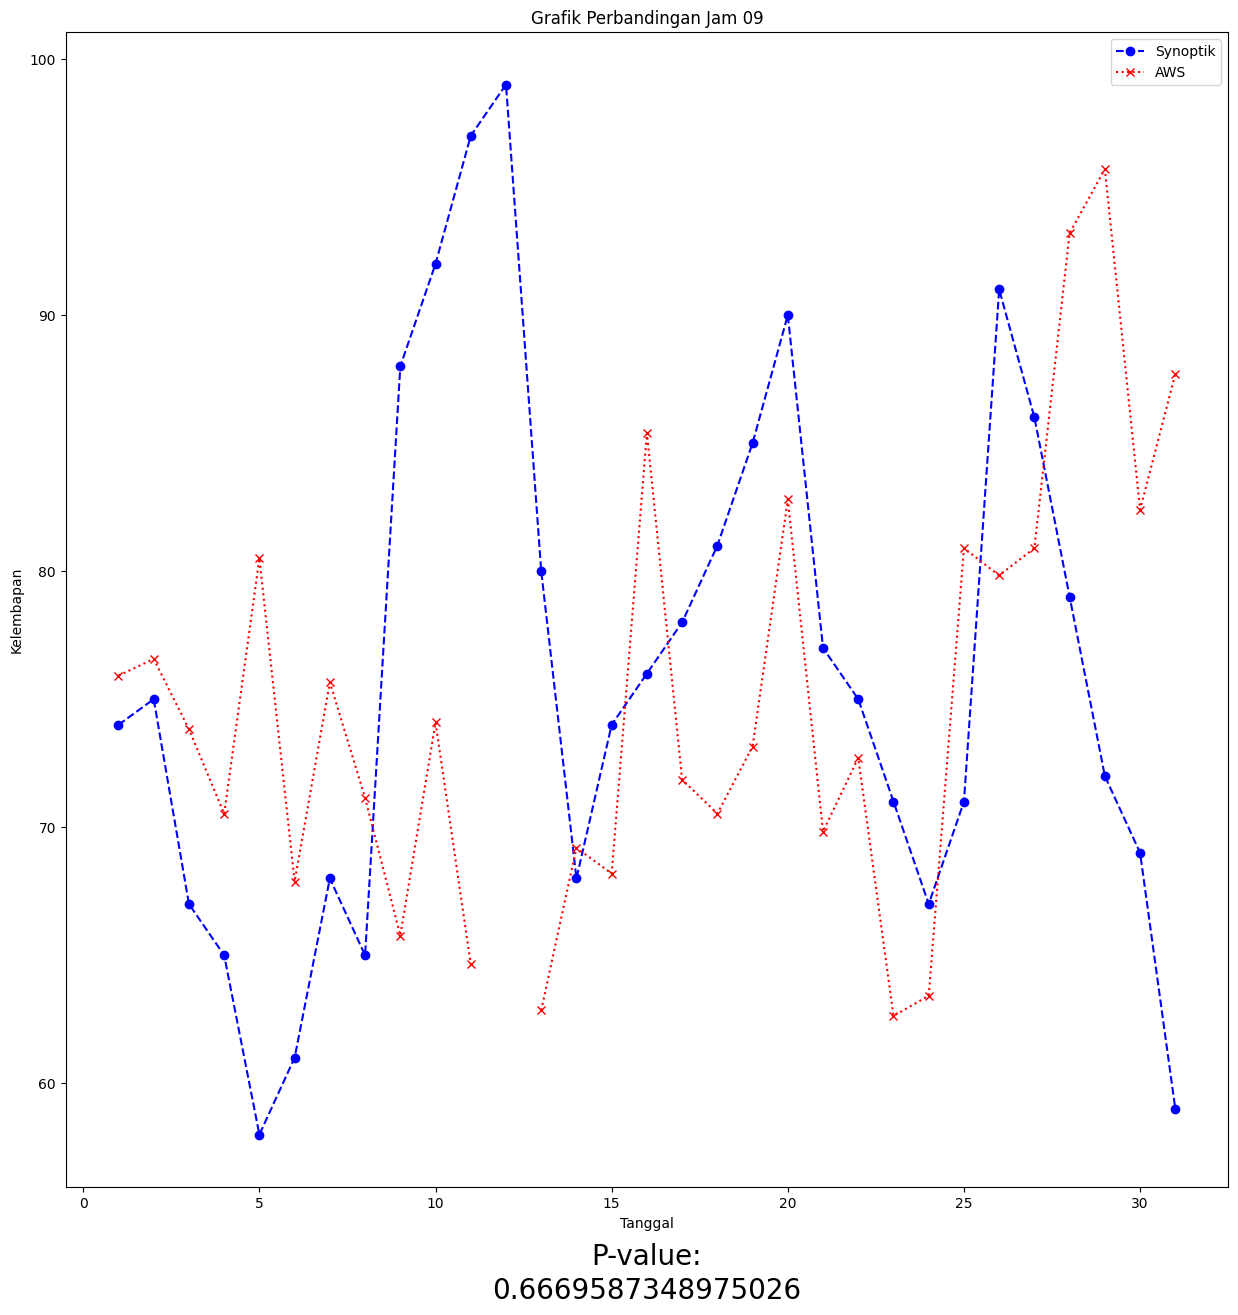

In [9]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('09:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['09.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='09.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['09.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('09.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['09.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='09.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['09.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('09.00')
    else:
      print("Dilakukan Uji T")
      ujiT('09.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('09.00')
    else:
      print("Dilakukan Uji T")
      ujiT('09.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 09')
plt.plot(df2_4['Tgl'], df2_4['09.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 10

Indeks baris yang berisi NaN:
Index([11], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.24658203526993977
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.8060734070430173
p-value for one tailed: 0.40303670352150867
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


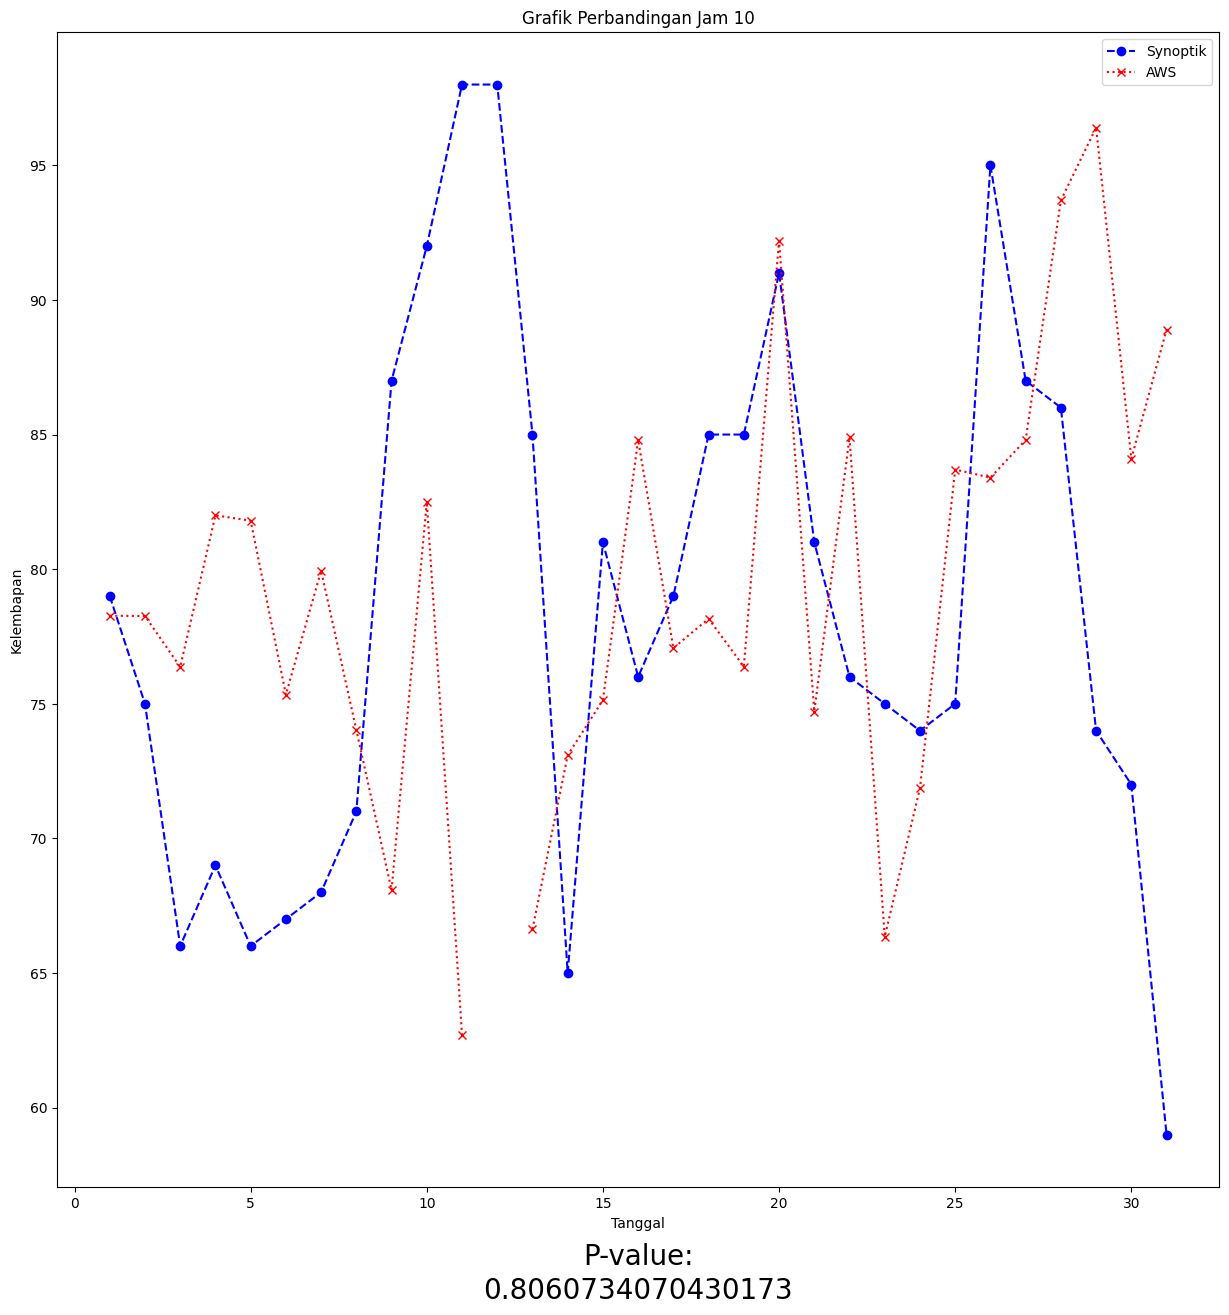

In [10]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('10:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['10.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='10.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['10.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('10.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['10.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='10.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['10.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10.00')
    else:
      print("Dilakukan Uji T")
      ujiT('10.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10.00')
    else:
      print("Dilakukan Uji T")
      ujiT('10.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 10')
plt.plot(df2_4['Tgl'], df2_4['10.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 11

Indeks baris yang berisi NaN:
Index([11], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.5048467675549657
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.1376098272977362
p-value for one tailed: 0.0688049136488681
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


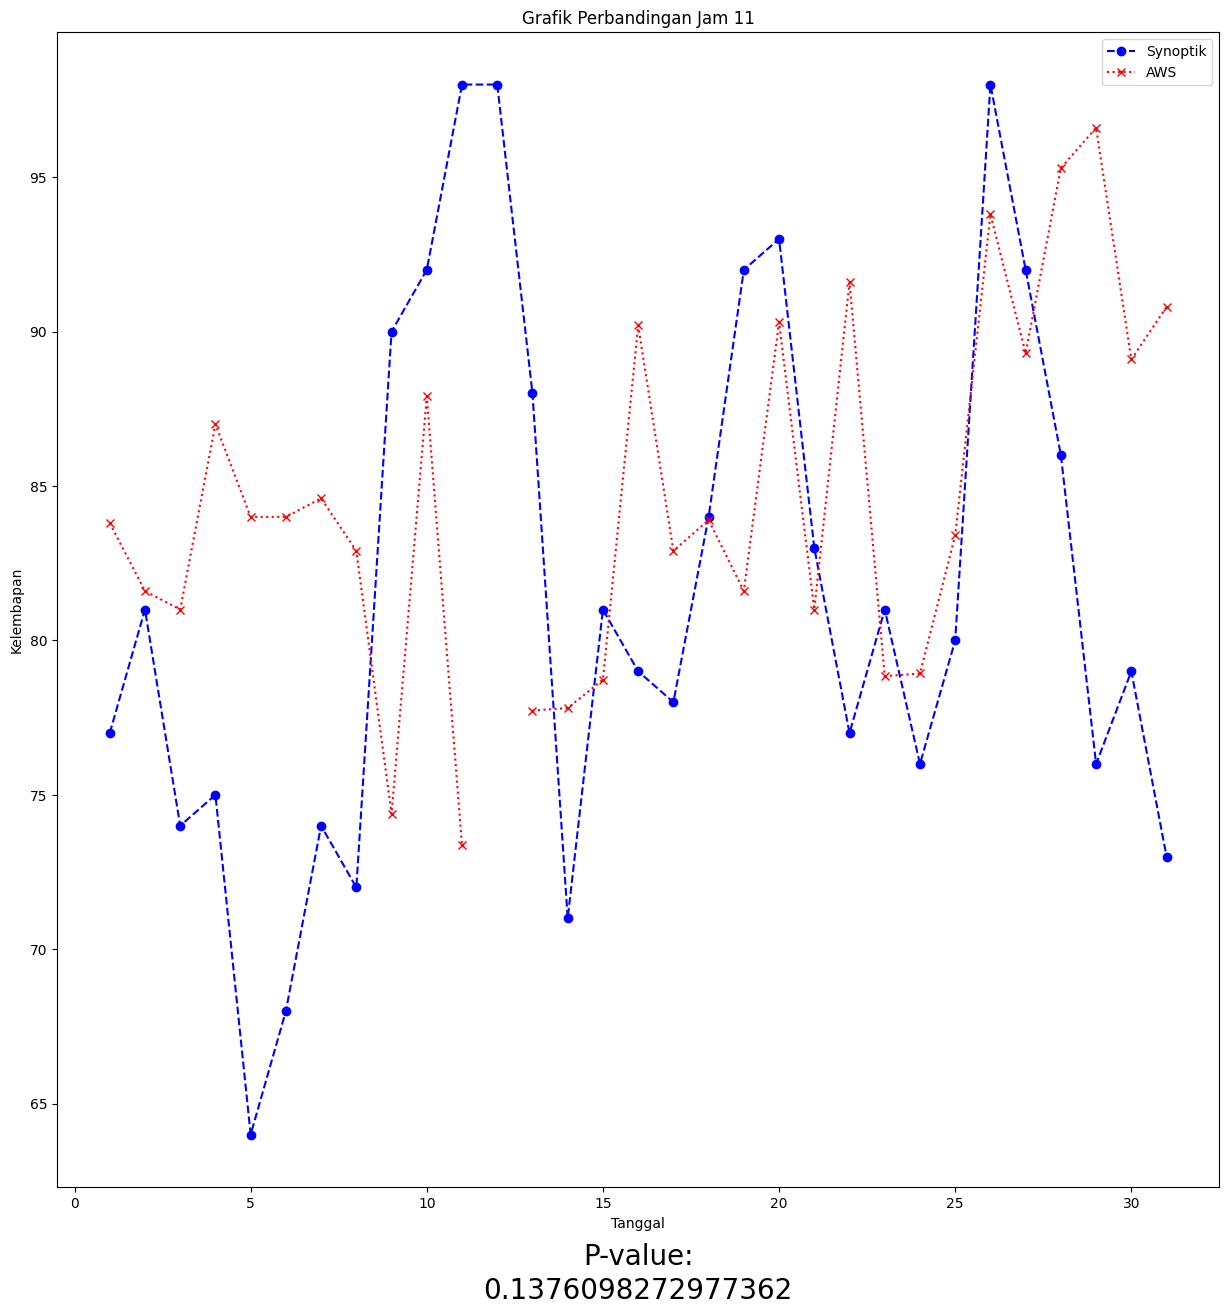

In [11]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('11:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['11.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='11.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['11.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('11.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['11.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='11.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['11.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11.00')
    else:
      print("Dilakukan Uji T")
      ujiT('11.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11.00')
    else:
      print("Dilakukan Uji T")
      ujiT('11.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 11')
plt.plot(df2_4['Tgl'], df2_4['11.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 12

Indeks baris yang berisi NaN:
Index([11], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 2.5820742141871365
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.01227972255238452
p-value for one tailed: 0.00613986127619226
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


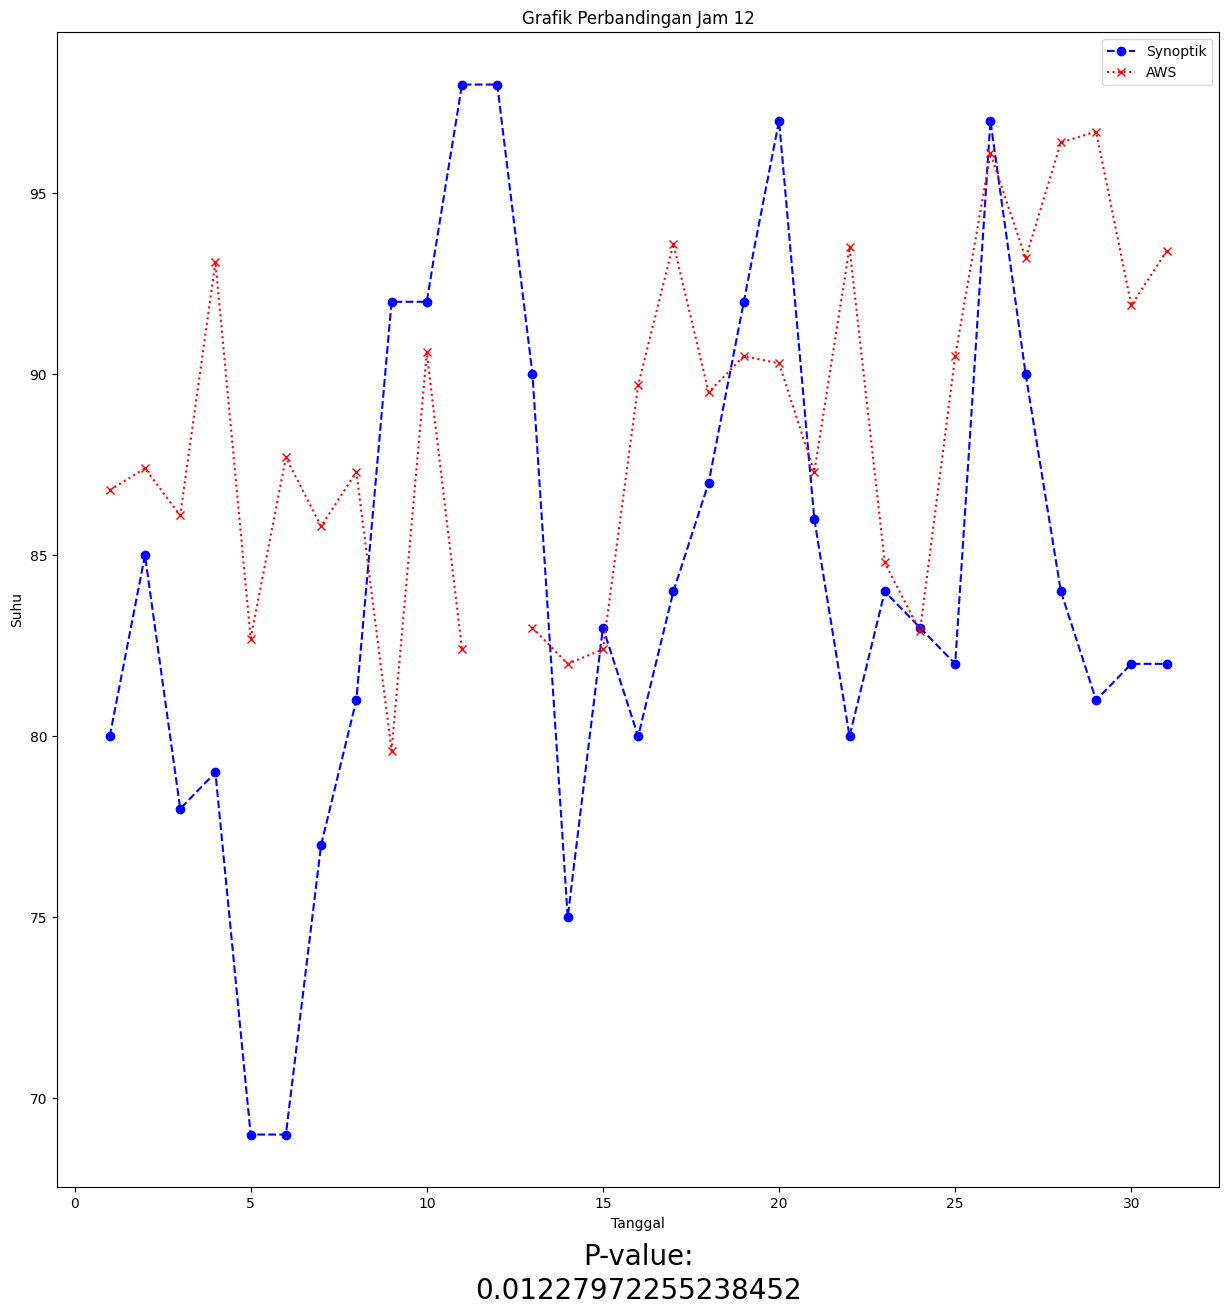

In [12]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('12:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['12.00']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='12.00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['12.00'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('12.00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['12.00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='12.00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['12.00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12.00')
    else:
      print("Dilakukan Uji T")
      ujiT('12.00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12.00')
    else:
      print("Dilakukan Uji T")
      ujiT('12.00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 12')
plt.plot(df2_4['Tgl'], df2_4['12.00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()